In [1]:
import pandas as pd
import numpy as np
import arff

In [2]:
file_path = r"C:\Users\Hasindu Lakshan\Documents\depression_dataset.arff"

with open(file_path, 'r') as f:
    dataset = arff.load(f)

In [3]:
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

print("Initial Dataset Shape:", df.shape)
print("First 5 rows:")
print(df.head())

Initial Dataset Shape: (27901, 18)
First 5 rows:
     id  Gender   Age           City Profession  Academic Pressure  \
0   2.0    Male  33.0  Visakhapatnam    Student                5.0   
1   8.0  Female  24.0      Bangalore    Student                2.0   
2  26.0    Male  31.0       Srinagar    Student                3.0   
3  30.0  Female  28.0       Varanasi    Student                3.0   
4  32.0  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2

In [4]:
print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)
        print(f"Filled missing values in '{col}' with MEAN")

Filled missing values in 'Financial Stress' with MEAN


C:\Users\Hasindu Lakshan\AppData\Local\Temp\ipykernel_7992\2339124779.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [6]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Filled missing values in '{col}' with MODE")

In [7]:
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [8]:
output_path = r"C:\Users\Hasindu Lakshan\Documents\depression_dataset_cleaned.csv"
df.to_csv(output_path, index=False)

print(f"\nCleaned dataset saved as: {output_path}")


Cleaned dataset saved as: C:\Users\Hasindu Lakshan\Documents\depression_dataset_cleaned.csv


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

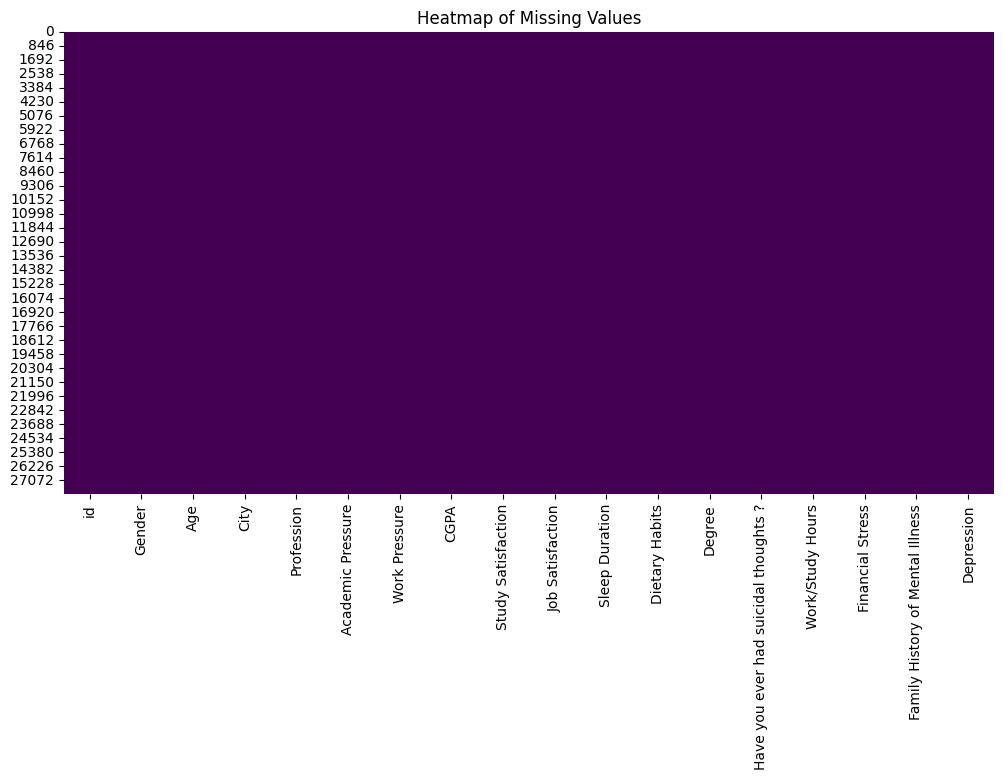

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()


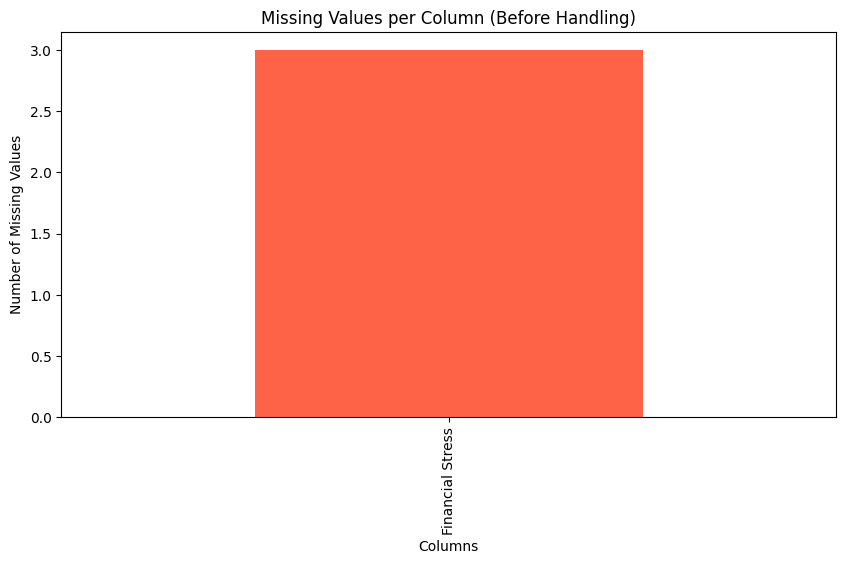

In [15]:
df_raw = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

missing_count = df_raw.isnull().sum()
missing_count = missing_count[missing_count > 0] 

if not missing_count.empty:
    plt.figure(figsize=(10,5))
    missing_count.plot(kind='bar', color='tomato')
    plt.title("Missing Values per Column (Before Handling)")
    plt.ylabel("Number of Missing Values")
    plt.xlabel("Columns")
    plt.show()
else:
    print("No missing values in raw dataset to visualize.")

In [16]:
missing_count = df.isnull().sum()
missing_count = missing_count[missing_count > 0]  
if not missing_count.empty:
    plt.figure(figsize=(10,5))
    missing_count.plot(kind='bar', color='tomato')
    plt.title("Missing Values per Column (Before Handling)")
    plt.ylabel("Number of Missing Values")
    plt.xlabel("Columns")
    plt.show()
else:
    print("No missing values to visualize.")

No missing values to visualize.


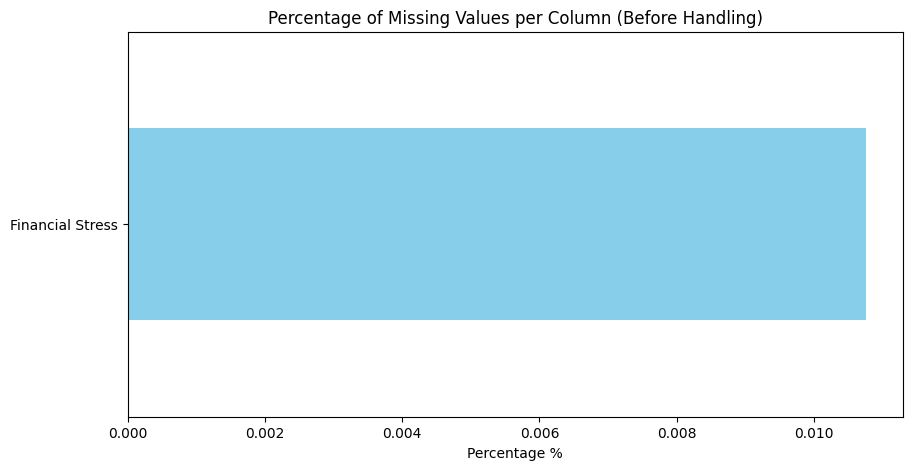

In [17]:
df_raw = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

missing_percent = (df_raw.isnull().sum() / len(df_raw)) * 100
missing_percent = missing_percent[missing_percent > 0]

if not missing_percent.empty:
    plt.figure(figsize=(10,5))
    missing_percent.plot(kind='barh', color='skyblue')
    plt.title("Percentage of Missing Values per Column (Before Handling)")
    plt.xlabel("Percentage %")
    plt.show()
else:
    print("No missing values in raw dataset to visualize.")

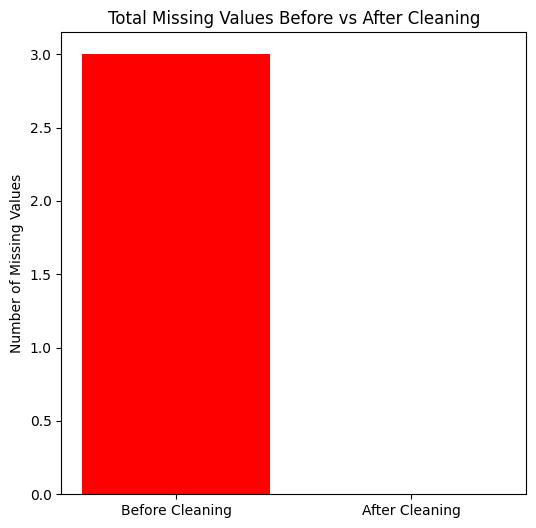

In [18]:
df_raw = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])
before_missing = df_raw.isnull().sum().sum()
after_missing = df.isnull().sum().sum()

plt.figure(figsize=(6,6))
plt.bar(["Before Cleaning", "After Cleaning"], [before_missing, after_missing], color=['red', 'green'])
plt.title("Total Missing Values Before vs After Cleaning")
plt.ylabel("Number of Missing Values")
plt.show()